In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
label=['class','mail','a','b','c']
mail=pd.read_csv('spam.csv',encoding="ISO-8859-1",names=label)

In [3]:
mail.head()

,class,mail,a,b,c
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [4]:
mail=mail.iloc[1:,:2]

In [5]:
mail.head()

,class,mail
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mail.shape

(5572, 2)

In [7]:
mail.loc[mail['class']=='spam','class',]=0
mail.loc[mail['class']=='ham','class',]=1

In [8]:
mail.head()

,class,mail
1,1,"Go until jurong point, crazy.. Available only ..."
2,1,Ok lar... Joking wif u oni...
3,0,Free entry in 2 a wkly comp to win FA Cup fina...
4,1,U dun say so early hor... U c already then say...
5,1,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
x=mail['mail']
y=mail['class']

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=2)

In [11]:
ham=(mail['class']==1).sum()
spam=len(mail)-ham
spam,ham

(747, 4825)

<BarContainer object of 2 artists>

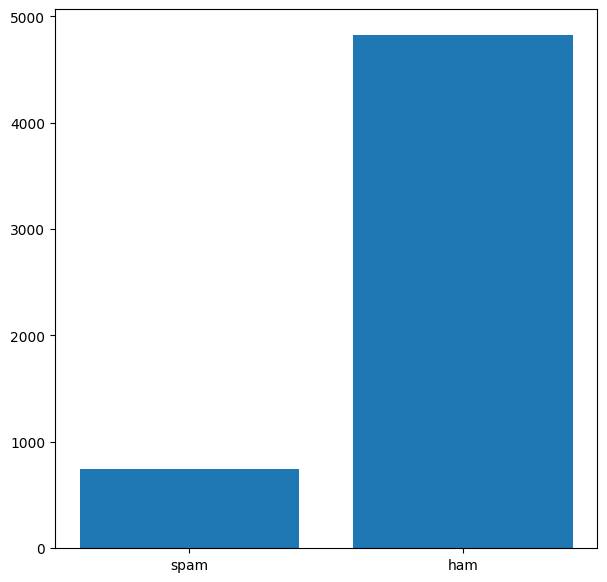

In [12]:
value=[spam,ham]
name=['spam','ham']
plt.figure(figsize=(7,7))
plt.bar(name,value)

In [13]:
extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
xtrainfeatures=extraction.fit_transform(xtrain)
xtestfeatures=extraction.transform(xtest)
ytrain=ytrain.astype('int')
ytest=ytest.astype('int')

In [14]:
svm=LinearSVC()
svm.fit(xtrainfeatures,ytrain)

LinearSVC()

In [15]:
prediction=svm.predict(xtestfeatures)
accuracy=accuracy_score(ytest,prediction)
accuracy

0.9775784753363229